In [2]:
import numpy as np
from astropy.table import Table

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
filepath = 'resources/globalAges.tsv'
RoseData = Table.read(filepath, format='ascii.commented_header', delimiter='\t')

In [71]:
filepath = 'data/Gupta11_table2.txt'
GuptaData = Table.read(filepath, format='ascii.csv', delimiter='\t', 
                       header_start=2, data_start=3, fill_values = ('...', 'np.nan'))
#Note ascii.commented_header NEEDS commented lines?
#This maskes the cells that were '...'

In [72]:
NotTested = [2943, 3199, 5844, 6649, 7512, 8030, 13956, 13757, 14298, 19067]   #could not get photomety
NotTested.extend((19794, 20376, 20821)) #need to finish CRC Run, 05-11 was killed before completion

In [73]:
print(len(GuptaData))
for i in NotTested:
    #find index of 'SN ID' match. Convert to int. Remove row.
    GuptaData.remove_row(np.where(GuptaData['SN ID'] == i)[0][0])
print(len(GuptaData))

206
193


In [92]:
yerr = (RoseData['age-uncert'] + RoseData['age+uncert'])/2
xerr = ( (GuptaData['Age']-GuptaData['Age -']) + (GuptaData['Age +']-GuptaData['Age']) )/2

In [97]:
sns.set_style("whitegrid")

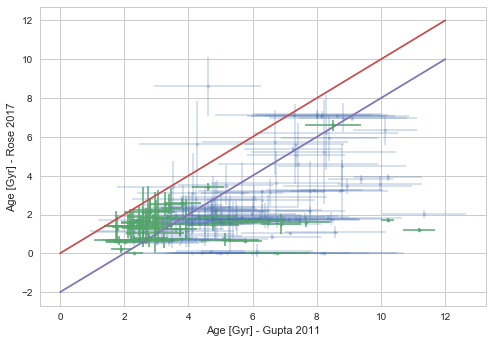

In [120]:
plt.figure('calibration1')
# plt.xscale('log', nonposy='clip')
# plt.yscale('log', nonposy='clip')
plt.errorbar(GuptaData['Age'], RoseData['age'], xerr=xerr, yerr=yerr, fmt='.', alpha=0.25)
plt.errorbar(GuptaData['Age'][xerr<1], RoseData['age'][xerr<1], xerr=xerr[xerr<1], yerr=yerr[xerr<1], fmt='.', alpha=0.75)
# sns.regplot(x=GuptaData['Age'], y=RoseData['age'])
# sns.jointplot(x=GuptaData['Age'], y=RoseData['age'], kind="reg")
plt.xlabel('Age [Gyr] - Gupta 2011')
plt.ylabel('Age [Gyr] - Rose 2017')
plt.plot(np.linspace(0,12), np.linspace(0,12))
plt.plot(np.linspace(0,12), np.linspace(0,12)-2.0)
plt.savefig('figures/ageCalibration_temp.pdf')
plt.show()

In [64]:
GuptaData

SN ID,IAU,RA,Dec,redshift,redshift uncert,M -,M,M +,Age -,Age,Age +,c,c uncert,x_1,x_1 uncert,HR,HR uncert
int64,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1166,--,9.3552761078,0.9739487767,0.3824,0.0005,11.08,11.15,11.22,4.13,6.47,7.53,0.023,0.068,1.274,1.103,-0.3288,0.2179
1253,2005fd,323.798583984,0.1628694236,0.262,0.005,11.27,11.34,11.39,5.89,7.8,8.03,-0.119,0.058,-1.28,0.464,-0.1097,0.1611
1371,2005fh,349.373748779,0.4296737611,0.11915,0.00012,10.95,11.0,11.02,5.27,6.76,7.26,-0.084,0.02,0.703,0.167,-0.1775,0.0566
1580,2005fb,45.3238296509,-0.6422790885,0.183,8e-05,10.61,10.73,10.83,3.58,5.2,6.95,-0.058,0.026,0.675,0.271,-0.1156,0.0775
1688,--,321.357818603,0.3248503506,0.3587,0.0005,10.09,10.2,10.32,1.5,2.04,2.74,0.007,0.07,1.019,1.306,0.024,0.2309
2017,2005fo,328.943878174,0.5934827328,0.2616,0.0005,10.48,10.54,10.57,4.26,5.84,6.66,-0.117,0.052,1.272,0.527,0.2671,0.1512
2165,2005fr,17.0916309357,-0.0962756798,0.288,0.005,9.33,9.39,9.46,1.86,2.21,3.52,-0.13,0.038,0.62,0.526,0.3219,0.1315
2330,2005fp,6.8073453903,1.1208769083,0.2132,0.0005,9.83,9.88,9.94,2.8,4.11,6.16,0.083,0.063,-2.238,0.569,0.2954,0.162
2372,2005ft,40.520816803,-0.5410116911,0.1805,0.0005,10.37,10.45,10.49,6.08,7.64,8.81,0.045,0.024,-0.015,0.225,-0.1379,0.0714


In [65]:
RoseData

SN,age,age-uncert,age+uncert
int64,float64,float64,float64
1166,2.24726963043,1.04496121407,0.502037227154
1253,3.18795919418,1.79519927502,1.32779455185
1371,0.0182669144124,0.00122318579815,0.000929805915803
1580,0.0065697375685,0.000385548250051,0.000431691121776
1688,0.58418571949,0.0444331504405,0.0397054851055
2017,1.64341855049,0.0973108559847,0.0833257585764
2165,1.40117573738,0.773038029671,0.679863572121
2330,0.00938008446246,0.0612789280713,0.00525784539059
2372,1.84734380245,0.241433665156,0.230671390891


In [70]:
for i in GuptaData['SN ID']:
    if len(np.where(RoseData['SN'] == i)[0]) == 0:
        print(i)

13956


There are those two data points that are "high quality" by Gupta's defintion, but I disagree with the resulting age by 8 to 10 Gyr! What host are they?

In [131]:
GuptaData[np.logical_and(GuptaData['Age'] > 10, GuptaData['Age'] - GuptaData['Age -'] < 1)]

SN ID,IAU,RA,Dec,redshift,redshift uncert,M -,M,M +,Age -,Age,Age +,c,c uncert,x_1,x_1 uncert,HR,HR uncert
int64,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
12781,2006er,5.4078617096,-1.0106090307,0.08431,0.00016,10.96,10.97,11.02,10.58,11.18,11.58,0.072,0.061,-2.128,0.337,0.1604,0.1149
15776,2006na,32.8302955627,-0.9981175065,0.305,0.005,11.18,11.19,11.21,9.81,10.21,10.21,-0.116,0.081,-1.662,0.743,0.1115,0.2089
